In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [3]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [8]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(260,)

In [9]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(260, 50, 50)

In [10]:
# plt.figure()
# plt.imshow(imgs[0])
# plt.grid(False)
# plt.show()

In [11]:
imgs = np.expand_dims(imgs, -1)


In [12]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [13]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [14]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [15]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20
13/13 [==============================] - 13s 893ms/step - loss: 3.5256 - accuracy: 0.0308 - val_loss: 3.2710 - val_accuracy: 0.0923
Epoch 2/20
13/13 [==============================] - 11s 880ms/step - loss: 3.1150 - accuracy: 0.1744 - val_loss: 2.9439 - val_accuracy: 0.0615
Epoch 3/20
13/13 [==============================] - 11s 863ms/step - loss: 2.0539 - accuracy: 0.3897 - val_loss: 0.8951 - val_accuracy: 0.7538
Epoch 4/20
13/13 [==============================] - 11s 865ms/step - loss: 0.6407 - accuracy: 0.8000 - val_loss: 0.7554 - val_accuracy: 0.7385
Epoch 5/20
13/13 [==============================] - 12s 904ms/step - loss: 0.5879 - accuracy: 0.8667 - val_loss: 0.3942 - val_accuracy: 0.8923
Epoch 6/20
13/13 [==============================] - 12s 887ms/step - loss: 0.2538 - accuracy: 0.9128 - val_loss: 0.3015 - val_accuracy: 0.9077
Epoch 7/20
13/13 [==============================] - 12s 909ms/step - loss: 0.1185 - accuracy: 0.9641 - val_loss: 0.2737 - val_accuracy: 0.8923

In [16]:

labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

3/3 [==============================] - 1s 108ms/step


In [17]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))


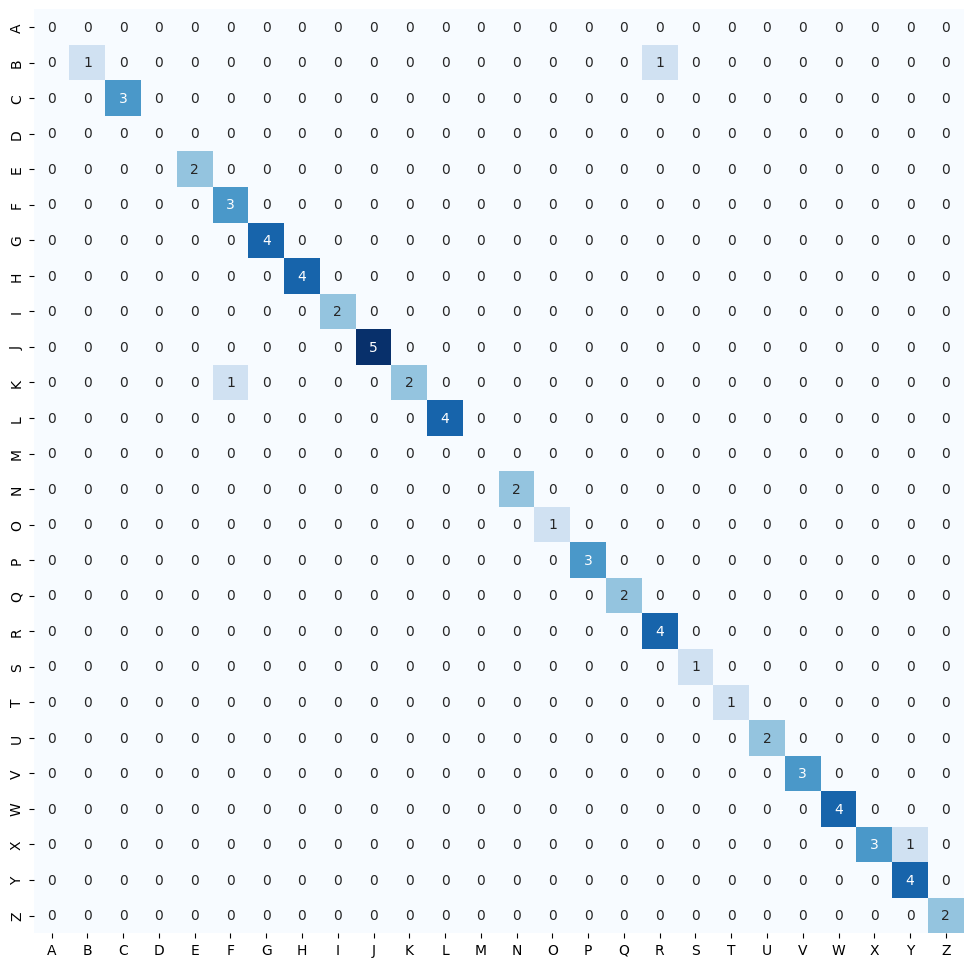

In [18]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [19]:
model.save('../letter.model')


INFO:tensorflow:Assets written to: ../letter.model\assets


INFO:tensorflow:Assets written to: ../letter.model\assets
